In [534]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import datetime
from sklearn import ensemble
from sklearn import model_selection
from sklearn import linear_model
import statsmodels.api as sm

In [535]:
df = pd.read_csv('CO2.csv')            

In [536]:
'''
The data is not in a very clean format. I will now attempt to drop a lot of 
rows to get what I need.
'''

'\nThe data is not in a very clean format. I will now attempt to drop a lot of \nrows to get what I need.\n'

In [537]:
df.drop(df.index[0:4], inplace = True)
# Dropping useless rows

In [538]:
df.drop(df.columns[59:64], axis = 1, inplace = True)
# Dropping useless cols

In [539]:
date = [datetime.date(1960, 1, 1) + datetime.timedelta(days=(x * 366)) for x in range(0, 55)]
date = [x.year for x in date]

In [540]:
df['World Development Indicators'].unique()
names = df.columns.tolist()
names[4:] = date
df.columns = names

In [541]:
df.rename(df['Data Source'], inplace = True)

In [542]:
USA = df[df['World Development Indicators'] == 'USA']
CAN = df[df['World Development Indicators'] == 'CAN']
CHN = df[df['World Development Indicators'] == 'CHN']


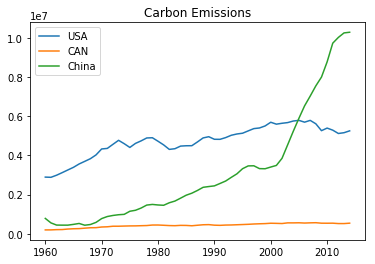

In [543]:
USAplot = plt.plot(USA.iloc[0,4:], label = 'USA')
CANplot = plt.plot(CAN.iloc[0,4:], label = 'CAN' )
CHNplot = plt.plot(CHN.iloc[0,4:], label = 'China')
plt.title('Carbon Emissions')
plt.legend()
plt.show()
#Rough plot for 3 countries

In [544]:
'''Time to do some more exploration
Let us plot the countries that have begun carbon taxes'''

'Time to do some more exploration\nLet us plot the countries that have begun carbon taxes'

In [545]:
explore = df.copy()
#I don't want to lose the original cleaned data

Text(0.5,1,'Finland Carbon Taxes')

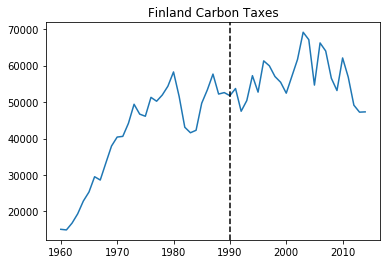

In [546]:
#Finland added a Carbon Tax in 1900 of .05%
FIN = df[df['World Development Indicators'] == 'FIN']
FIN.iloc[0,4:].plot()
plt.axvline(x = 1990, color = 'k', linestyle = '--')
plt.title('Finland After Carbon Taxes')

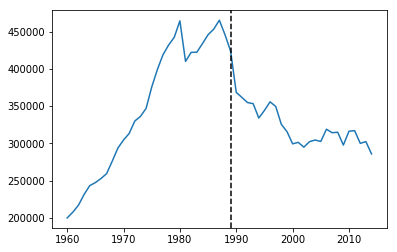

In [547]:
#Poland added a Carbon Tax of .03% in 1990
POL = df[df['World Development Indicators'] == 'POL']
POL.iloc[0,4:].plot()
plt.axvline(x = 1989, color = 'k', linestyle = '--')
plt.title('Poland After Carbon Taxes')

Text(0.5,1,'Norway After Carbon Taxes')

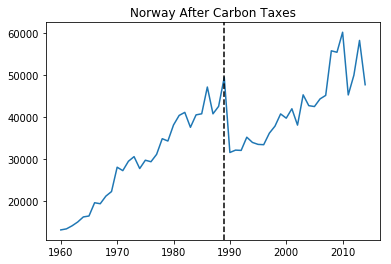

In [658]:
NOR = df[df['World Development Indicators'] == 'NOR']
NOR.iloc[0,4:].plot()
plt.axvline(x = 1989, color = 'k', linestyle = '--')
plt.title('Norway After Carbon Taxes')

Text(0.5,1,'European Union After Carbon Taxes')

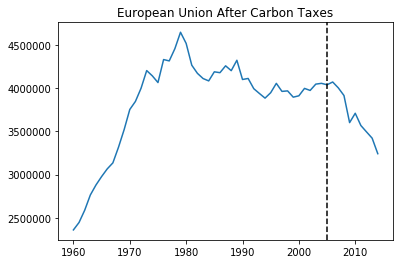

In [659]:
#The EU implimented the most sweeping Tax at 3.45% using the ETS
EUU = df[df['World Development Indicators'] == 'EUU']
EUU.iloc[0,4:].plot()
plt.axvline(x = 2005, color = 'k', linestyle = '--')
plt.title('European Union After Carbon Taxes')

Text(0.5,1,'Ukraine After Carbon Taxes')

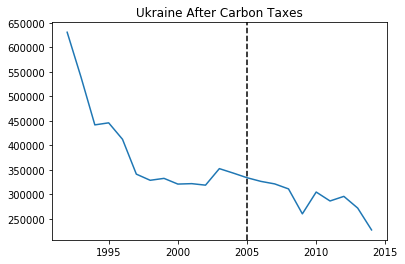

In [660]:
UKR = df[df['World Development Indicators'] == 'UKR']
UKR.iloc[0,4:].plot()
plt.axvline(x = 2005, color = 'k', linestyle = '--')
plt.title('Ukraine After Carbon Taxes')

Text(0.5,1,'Finland vs Denmark After One impliments Taxes Carbon Taxes')

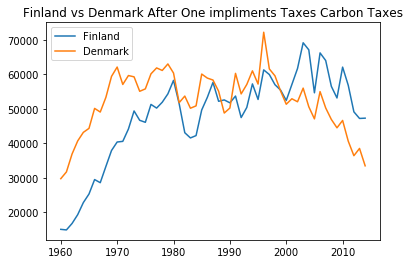

In [661]:
#Let us check a like-country to see if there is a difference
FIN.iloc[0,4:].plot()
DNK = df[df['World Development Indicators'] == 'DNK']
DNK.iloc[0,4:].plot()
plt.legend()
plt.title('Finland vs Denmark After One impliments Taxes Carbon Taxes')

Text(0.5,1,'Highlighting the Years')

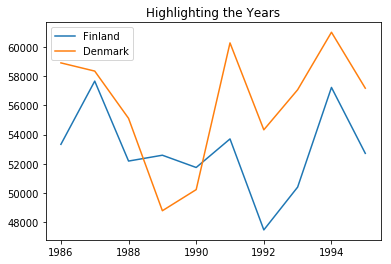

In [662]:
FIN.iloc[0,30:40].plot()
DNK.iloc[0,30:40].plot()
plt.legend()
plt.title('Highlighting the Years')

In [553]:
'''Let us do a difference in differences regression analysis'''
Europe = EUU.copy()
United = USA.copy()
Europe = Europe.T
Europe['Dummies'] = 1
Europe = Europe.T
United = United.T
United['Dummies'] = 1
United = United.T

In [554]:
'''Time to find where the difference variables should be changed'''
#This will set the dummies equal to zero when the 'treatment' occurs
Europe.iloc[1, 49:] = 0
United.iloc[1, 49:] = 0

In [555]:
#Next, we must find the differences variable
regression = pd.DataFrame()
regression['USA'] = United.iloc[0,:]
regression['USADummies'] = United.iloc[1,:]
regression['EU'] = Europe.iloc[0,:]
regression['EUDummies'] = Europe.iloc[1,:]
regression['CrossTerm'] = regression['USADummies'] * regression['EUDummies']

In [556]:
regr = linear_model.LinearRegression()
y = regression['EU']
x = regression.copy()
x.drop('EU', axis = 1, inplace = True)
x.drop('Data Source', inplace = True)
x.drop('World Development Indicators', inplace = True)
x.drop('Unnamed: 2', inplace = True)
x.drop('Unnamed: 3', inplace = True)
y.drop('Data Source', inplace = True)
y.drop('World Development Indicators', inplace = True)
y.drop('Unnamed: 2', inplace = True)
y.drop('Unnamed: 3', inplace = True)

In [557]:
fit = regr.fit(x, y)

In [558]:
print(fit.coef_)
#The cross terms are statistically significant, so this means there is a different treatment. 

[5.74937755e-01 2.12897813e+05 2.12897813e+05 2.12897813e+05]


In [559]:
'''Now that we've shown that there is a different treatment, let's try to find a difference between an expected vs actual EU
I think that I'll do this by using High-Income countries as a test subject, and compare those to the EU'''

"Now that we've shown that there is a different treatment, let's try to find a difference between an expected vs actual EU\nI think that I'll do this by using High-Income countries as a test subject, and compare those to the EU"

Text(0.5,1,'World vs High Income')

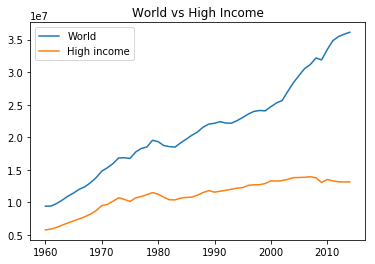

In [663]:
#As can be seen from the graph, mainly developing countries have increased the emissions in the last few years.
WLD = df[df['World Development Indicators'] == 'WLD']
WLD.iloc[0,4:].plot()
HIC = df[df['World Development Indicators'] == 'HIC']
HIC.iloc[0,4:].plot()
plt.legend()
plt.title('World vs High Income')

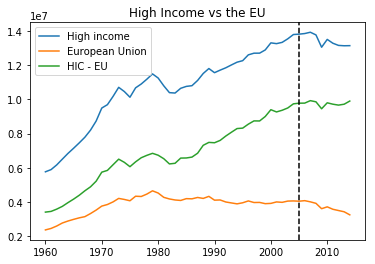

In [665]:
HIC = df[df['World Development Indicators'] == 'HIC']
HIC.iloc[0,4:].plot()
EUU = df[df['World Development Indicators'] == 'EUU']
EUU.iloc[0,4:].plot()
#Removing EU from the HIC Countries
Untreated = HIC.iloc[0,4:] - EUU.iloc[0,4:]
plt.plot(Untreated, label = 'HIC - EU')
plt.legend()
plt.title('High Income vs the EU')
plt.axvline(x = 2005, color = 'k', linestyle = '--')

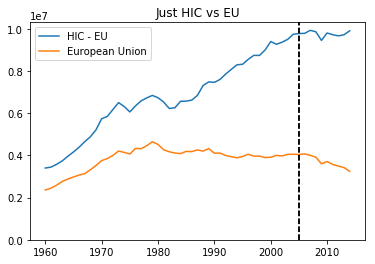

In [666]:
Untreated = HIC.iloc[0,4:] - EUU.iloc[0,4:]
plt.plot(Untreated, label = 'HIC - EU')
plt.legend()
EUU = df[df['World Development Indicators'] == 'EUU']
EUU.iloc[0,4:].plot()
plt.axvline(x = 2005, color = 'k', linestyle = '--')
plt.legend()
plt.ylim(bottom=0)
plt.title('Just HIC vs EU')
plt.axvline(x = 2005, color = 'k', linestyle = '--')

In [675]:
((HIC.iloc[0,58:59] - HIC.iloc[0,48]) / HIC.iloc[0,58:59]) * 100
#4.8% Change for High Income Countries

2014   -4.95215
Name: High income, dtype: object

In [674]:
((EUU.iloc[0,58:59] - EUU.iloc[0,48]) / EUU.iloc[0,58:59]) * 100
#20.12% Change for the EU

2014   -25.1181
Name: European Union, dtype: object

In [679]:
lst = []
for x in range(4,48):
    lst.append(1)
for x in range(48, 59):
    lst.append((1 + (EUU.iloc[0,x] - EUU.iloc[0,x-1]) / EUU.iloc[0,x]))

In [680]:
#Treating all the High Income Countries with the Average Change of the EU after the change
HighIncome = HIC.iloc[0,4:]
HighIncome = pd.DataFrame(HighIncome)
HighIncome = HighIncome.T
Treated = pd.DataFrame((HIC.iloc[0,4:].values)* lst).rename({0: 'Treated'}, axis = 1)
Treated.index = date
HighIncome = HighIncome.append(Treated.T)

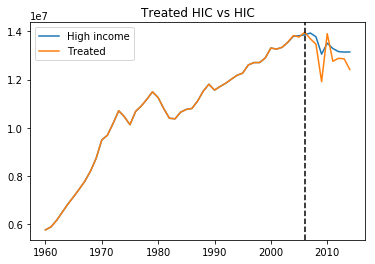

In [681]:
HighIncome.iloc[0].plot()
HighIncome.iloc[1].plot()
plt.title('Treated HIC vs HIC')
plt.axvline(x = 2006, color = 'k', linestyle = '--')
plt.legend()

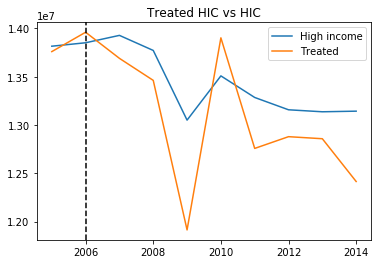

In [682]:
HighIncome.iloc[0, 45:].plot()
HighIncome.iloc[1, 45:].plot()
plt.title('Treated HIC vs HIC')
plt.axvline(x = 2006, color = 'k', linestyle = '--')
plt.legend()

In [683]:
HighIncome.iloc[0, 49:50].values - HighIncome.iloc[1, 49:50].values

array([1136907.6776528414], dtype=object)